# 8장 다중회귀 모형과 그 추정

## 예제 8.1 음주율과 사망률

In [1]:
%config InlineBackend.figure_formats = ['svg']

In [2]:
import pandas as pd
import statsmodels.formula.api as smf

Death = pd.read_csv('csv/loedata/Death.csv')
ols = smf.ols('deathrate~drink', data=Death[Death.year==2010]).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              deathrate   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     39.14
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           1.59e-08
Time:                        11:08:11   Log-Likelihood:                -173.59
No. Observations:                  86   AIC:                             351.2
Df Residuals:                      84   BIC:                             356.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.1006      1.722     12.252      0.000      17.676      24.525
drink         -0.2268      0.036     -6.256      0.000      -0.299      -0.155
==============================================================================
Omnibus:                        0.580   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.748   Jarque-Bera (JB):                0.574
Skew:                          -0.188   Prob(JB):                        0.750
Kurtosis:                       2.865   Cond. No.                         412.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

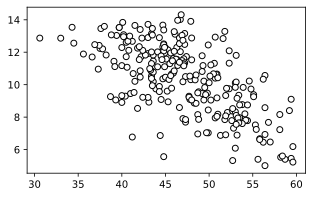

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.scatter(Death.drink, Death.deathrate, facecolors='w', edgecolors='k')
plt.show()

## 예제 8.2 음주율과 사망률(계속)

In [4]:
smf.ols('deathrate~drink+aged', data=Death[Death.year==2010]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              deathrate   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     470.0
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           5.38e-46
Time:                        11:08:12   Log-Likelihood:                -82.034
No. Observations:                  86   AIC:                             170.1
Df Residuals:                      83   BIC:                             177.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6139      1.060     -0.579      0.564      -2.722       1.495
drink          0.0344      0.016      2.099      0.039       0.002       0.067
aged           0.4058      0.016     24.797      0.000       0.373       0.438
==============================================================================
Omnibus:                        0.091   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.086
Skew:                          -0.064   Prob(JB):                        0.958
Kurtosis:                       2.912   Cond. No.                         810.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 예제 8.3 여성 더미, 남성 더미, 공선성

In [5]:
import pandas as pd
import numpy as np

Wages1 = pd.read_csv('csv/Ecdat/Wages1.csv')
## https://stackoverflow.com/questions/20840803/how-to-convert-false-to-0-and-true-to-1
Wages1['male'] = [int(x) for x in Wages1.sex=='male'] # :-(
Wages1['female'] = [int(x) for x in Wages1.sex=='female'] # :-(
Wages1.head()

,exper,sex,school,wage,male,female
0,9,female,13,6.315296,0,1
1,12,female,12,5.479770,0,1
2,11,female,11,3.642170,0,1
3,9,female,14,4.593337,0,1
4,8,female,14,2.418157,0,1


In [6]:
np.sum(Wages1.male), np.sum(Wages1.female)

(1725, 1569)

대상을 여성으로 한정하면 `female` 더미변수는 상수항과 완전한 공선성을 갖는다. 그럼에도 파이썬은 (실수 연산의 불가피한 부정확성으로 인하여) 여전히 값을 계산한다. [Stack overflow의 이 글](https://stackoverflow.com/questions/74474611/statsmodels-ols-gives-parameters-despite-perfect-multicollinearity)에 이유가 있다. 이렇게 처리하는 것은 예측 시에는 큰 문제가 없을 수도 있으나 **인과관계 분석에서는 용납되지 않는다**. R은 공선성을 체크하여 공선성이 있다고 판단되면 해당 변수에 `NA`를 리포트한다.

In [7]:
import statsmodels.formula.api as smf
ols = smf.ols('wage~female', data=Wages1[Wages1.female==1]).fit()
print(ols.params)

Intercept    8.384840e+12
female      -8.384840e+12
dtype: float64


위 결과를 보고 절편과 `female` 더미변수의 계수가 &pm;8,384,400,000,000처럼 터무니없이 큰 값이라고 생각해서는 안 된다. 파이썬의 `statsmodels` 모듈이 그런 식으로 공선성을 잘못 처리하도록 코딩되었나보다 생각하면 된다. 공선성에 관한 한 `statsmodels`는 믿을 수 없다. 참고로, summary는 더 많은 정보를 담고 있다.

In [8]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                      -0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   -0.8714
Date:                Wed, 11 Feb 2026   Prob (F-statistic):               1.00
Time:                        11:08:12   Log-Likelihood:                -3883.9
No. Observations:                1569   AIC:                             7772.
Df Residuals:                    1567   BIC:                             7782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.385e+12   2.06e+13      0.406      0.685   -3.21e+13    4.89e+13
female     -8.385e+12   2.06e+13     -0.406      0.685   -4.89e+13    3.21e+13
==============================================================================
Omnibus:                      762.482   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8859.515
Skew:                           1.975   Prob(JB):                         0.00
Kurtosis:                      13.951   Cond. No.                     5.68e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.71e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

위 Notes \[2\]에 강한 다중상관 또는 특이성이 존재한다는 말이 있다.

다음은 공선성 문제가 없는 결과이다.

In [9]:
smf.ols('wage~female', data=Wages1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     107.9
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           6.71e-25
Time:                        11:08:12   Log-Likelihood:                -8522.2
No. Observations:                3294   AIC:                         1.705e+04
Df Residuals:                    3292   BIC:                         1.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3130      0.077     81.495      0.000       6.161       6.465
female        -1.1661      0.112    -10.389      0.000      -1.386      -0.946
==============================================================================
Omnibus:                     1538.963   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15569.712
Skew:                           1.965   Prob(JB):                         0.00
Kurtosis:                      12.899   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

다음은 남성 더미와 여성 더미를 모두 포함시켰고 절편도 있으므로 완전한 공선성이 있다.

In [10]:
smf.ols('wage~male+female', data=Wages1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     53.94
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           8.90e-24
Time:                        11:08:12   Log-Likelihood:                -8522.2
No. Observations:                3294   AIC:                         1.705e+04
Df Residuals:                    3291   BIC:                         1.707e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.441e+11   2.35e+12      0.104      0.917   -4.37e+12    4.85e+12
male       -2.441e+11   2.35e+12     -0.104      0.917   -4.85e+12    4.37e+12
female     -2.441e+11   2.35e+12     -0.104      0.917   -4.85e+12    4.37e+12
==============================================================================
Omnibus:                     1538.658   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15564.272
Skew:                           1.965   Prob(JB):                         0.00
Kurtosis:                      12.898   Cond. No.                     8.90e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.24e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

여기도 마찬가지이다. 파이썬 `statsmodels` 모듈은 다중공선성 문제에 대한 판단을 사람에게 맡긴다. 인과관계 분석에서는 **매우 조심해야 한다**.

남성 더미변수와 여성 더미변수가 있더라도 절편이 없으면 공선성 문제는 발생하지 않는다.

In [11]:
smf.ols('wage~male+female-1', data=Wages1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     107.9
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           6.71e-25
Time:                        11:08:12   Log-Likelihood:                -8522.2
No. Observations:                3294   AIC:                         1.705e+04
Df Residuals:                    3292   BIC:                         1.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
male           6.3130      0.077     81.495      0.000       6.161       6.465
female         5.1469      0.081     63.366      0.000       4.988       5.306
==============================================================================
Omnibus:                     1538.963   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15569.712
Skew:                           1.965   Prob(JB):                         0.00
Kurtosis:                      12.899   Cond. No.                         1.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 맞춘값, 잔차, 제곱합, R제곱

In [12]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

Wages1 = pd.read_csv('csv/Ecdat/Wages1.csv')
smf.ols('np.log(wage)~sex+school+exper', data=Wages1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     174.7
Date:                Wed, 11 Feb 2026   Prob (F-statistic):          4.04e-105
Time:                        11:08:12   Log-Likelihood:                -2869.8
No. Observations:                3294   AIC:                             5748.
Df Residuals:                    3290   BIC:                             5772.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2593      0.088     -2.936      0.003      -0.433      -0.086
sex[T.male]     0.2426      0.020     11.860      0.000       0.202       0.283
school          0.1234      0.006     19.802      0.000       0.111       0.136
exper           0.0354      0.005      7.845      0.000       0.027       0.044
==============================================================================
Omnibus:                      881.201   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3779.073
Skew:                          -1.239   Prob(JB):                         0.00
Kurtosis:                       7.625   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared는 다음과 같이 얻는다.

In [13]:
np.random.seed(1)
Wages1['rnd'] = np.random.normal(size=len(Wages1))
## https://www.statsmodels.org/0.6.1/examples/notebooks/generated/ols.html
smf.ols('np.log(wage)~sex+school+exper', data=Wages1).fit().rsquared

0.13743765266234365

어떤 변수든 설명변수로 포함시키기만 하면 R-squared는 증가한다.

In [14]:
smf.ols('np.log(wage)~sex+school+exper+rnd', data=Wages1).fit().rsquared

0.1374480389013667